# IA 340 MINI PROJECT

## Data Overview and Research Question
https://catalog.data.gov/dataset/border-crossing-entry-data-683ae
Research question = what is the most used method of transportation in border crossings.
The Border Crossing Entry Data dataset contains detailed records of vehicles, equipment, passengers, and pedestrians entering the United States through various land ports along the U.S.–Canada and U.S.–Mexico borders. Each record represents the total number of crossings for a specific port name, state, border (northern or southern), date, and transportation type (such as trucks, trains, buses, personal vehicles, or pedestrians). The Border Crossing Entry Data dataset spans from January 1996 to the most recent available month (typically updated monthly by the U.S. Bureau of Transportation Statistics).

 I chose this data set because it shows all sorts of border crossing and immigration data, which i useful to my analysis.



In [17]:


import pandas as pd

df = pd.read_csv('s3://ia-340-2025-fall-1551/Border.csv')

df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)


## Data Cleaning

In [18]:


print("=== Dataset Info ===")
df.info()

print("\n=== Summary Statistics ===")
display(df.describe(include='all'))

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403857 entries, 0 to 403856
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  403857 non-null  object 
 1   State      403853 non-null  object 
 2   Port Code  403857 non-null  int64  
 3   Border     403857 non-null  object 
 4   Date       403857 non-null  object 
 5   Measure    403857 non-null  object 
 6   Value      403857 non-null  int64  
 7   Latitude   403853 non-null  float64
 8   Longitude  403853 non-null  float64
 9   Point      403853 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.8+ MB

=== Summary Statistics ===


,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
count,403857,403853,403857.000000,403857,403857,403857,4.038570e+05,403853.000000,403853.000000,403853
unique,117,14,NaN,2,356,12,NaN,NaN,NaN,116
top,Eastport,North Dakota,NaN,US-Canada Border,Aug 2010,Personal Vehicles,NaN,NaN,NaN,POINT (-115.388018 32.673389)
freq,6833,64955,NaN,308478,1356,38441,NaN,NaN,NaN,7513
mean,NaN,NaN,2445.253124,NaN,NaN,NaN,2.906242e+04,43.960542,-99.707753,NaN
std,NaN,NaN,1204.537165,NaN,NaN,NaN,1.494412e+05,8.154393,18.261587,NaN
min,NaN,NaN,101.000000,NaN,NaN,NaN,0.000000e+00,25.952000,-141.001000,NaN
25%,NaN,NaN,2304.000000,NaN,NaN,NaN,0.000000e+00,42.999000,-114.728000,NaN
50%,NaN,NaN,3012.000000,NaN,NaN,NaN,1.530000e+02,48.122000,-101.628000,NaN
75%,NaN,NaN,3401.000000,NaN,NaN,NaN,3.087000e+03,49.000000,-84.361000,NaN


In [19]:
print("\n=== Missing Values ===")
print(df.isnull().sum())

df = df.dropna(subset=['Port Name', 'State', 'Border', 'Date', 'Measure', 'Value'])

df['Value'] = df['Value'].fillna(0)

print("\nAfter handling missing values:")
print(df.isnull().sum())


=== Missing Values ===
Port Name    0
State        4
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     4
Longitude    4
Point        4
dtype: int64

After handling missing values:
Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     0
Longitude    0
Point        0
dtype: int64


In [20]:
initial_shape = df.shape
df = df.drop_duplicates()
print(f"\nRemoved {initial_shape[0] - df.shape[0]} duplicate rows.")


Removed 10 duplicate rows.


In [21]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

print("\nAfter datatype fixes:")
print(df.dtypes)


After datatype fixes:
Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Latitude            float64
Longitude           float64
Point                object
dtype: object


In [22]:
invalid_values = df[df['Value'] < 0]
if not invalid_values.empty:
    print("⚠️ Invalid entries found (negative crossing counts):")
    display(invalid_values)
else:
    print("✅ All crossing values are valid (non-negative).")

print("\nUnique Borders:", df['Border'].unique())
print("Number of Measure categories:", df['Measure'].nunique())

✅ All crossing values are valid (non-negative).

Unique Borders: ['US-Canada Border' 'US-Mexico Border']
Number of Measure categories: 12


## 
The **Border Crossing Entry Data** has been successfully cleaned and prepared for analysis.  
We began by profiling the dataset using `.info()` and `.describe()` to understand its structure and summary statistics.  
Missing values were handled by dropping incomplete rows in key columns and filling numerical gaps with zeros to maintain consistency.  
Duplicate records were removed to prevent inaccurate counts, and datatypes were corrected—specifically converting **Date** to a proper datetime format and **Value** to numeric.  
Finally, validity checks confirmed that all crossing counts are non-negative and categorical fields like **Border** and **Measure** contain consistent entries.  

With these steps complete, the dataset is now reliable, consistent, and ready for deeper analysis and visualization.

## Process

In [23]:


# Summary 1: Average crossings grouped by 'Measure'
avg_by_measure = df.groupby('Measure')['Value'].mean().reset_index()
avg_by_measure.columns = ['Measure', 'Average Crossings']
print("Average Crossings by Measure:")
print(avg_by_measure)

# Summary 2: Percent change from January to April 2024
jan_2024 = df[df['Date'] == '2024-01-01']
apr_2024 = df[df['Date'] == '2024-04-01']

jan_summary = jan_2024.groupby('Measure')['Value'].sum().reset_index()
apr_summary = apr_2024.groupby('Measure')['Value'].sum().reset_index()

merged = pd.merge(jan_summary, apr_summary, on='Measure', suffixes=('_Jan', '_Apr'))
merged['Percent Change'] = ((merged['Value_Apr'] - merged['Value_Jan']) / merged['Value_Jan']) * 100

print("\nPercent Change in Crossings from Jan to Apr 2024:")
print(merged)

Average Crossings by Measure:
                        Measure  Average Crossings
0                Bus Passengers        4980.724361
1                         Buses         297.181739
2                   Pedestrians       38844.942612
3   Personal Vehicle Passengers      167203.877477
4             Personal Vehicles       80689.280949
5         Rail Containers Empty        1004.370828
6        Rail Containers Loaded        1750.772782
7              Train Passengers         252.208246
8                        Trains          36.818603
9        Truck Containers Empty        2342.934365
10      Truck Containers Loaded        6910.551535
11                       Trucks        8968.257196

Percent Change in Crossings from Jan to Apr 2024:
                        Measure  Value_Jan  Value_Apr  Percent Change
0                Bus Passengers     198052     244002       23.200978
1                         Buses       9554      14693       53.788989
2                   Pedestrians    2078103    

## data creation summary
This Python code performs a structured analysis of border crossing data stored in an S3 bucket. It begins by importing necessary libraries and reading the CSV file directly from the S3 path using pandas. The Date column is converted into a datetime format to enable time-based filtering. The first part of the analysis calculates the average number of crossings for each type of border activity (e.g., trucks, pedestrians, buses) by grouping the data by the Measure column. The second part compares total crossings in January and April 2024 for each measure, calculating the percent change to highlight trends or shifts in border traffic. This approach helps identify seasonal patterns and changes in transportation modes over time.


In [24]:


filtered_df = df[(df['State'] == 'Texas') & (df['Date'] == '2024-04-01')]

print(filtered_df)


        Port Name  State  Port Code            Border       Date  \
730   Brownsville  Texas       2301  US-Mexico Border 2024-04-01   
754      Tornillo  Texas       2404  US-Mexico Border 2024-04-01   
755       El Paso  Texas       2402  US-Mexico Border 2024-04-01   
756       Hidalgo  Texas       2305  US-Mexico Border 2024-04-01   
782        Laredo  Texas       2304  US-Mexico Border 2024-04-01   
...           ...    ...        ...               ...        ...   
2219       Laredo  Texas       2304  US-Mexico Border 2024-04-01   
2226     Presidio  Texas       2403  US-Mexico Border 2024-04-01   
2227      El Paso  Texas       2402  US-Mexico Border 2024-04-01   
2230       Ysleta  Texas       2401  US-Mexico Border 2024-04-01   
2233      El Paso  Texas       2402  US-Mexico Border 2024-04-01   

                          Measure   Value  Latitude  Longitude  \
730        Truck Containers Empty   22354    25.952    -97.401   
754   Personal Vehicle Passengers  116313    31.435

## Summary of code above 
The generated code is designed to analyze border crossing data stored in an Amazon S3 bucket. It begins by importing the pandas library and reading the CSV file directly from the S3 path using pd.read_csv(). To ensure proper date handling, the Date column is converted into a datetime format. The code then applies a meaningful filter to extract only the records where the State is "Texas" and the Date is April 2024. This filtered subset is stored in a new DataFrame called filtered_df, which is then printed to display the relevant entries. This approach allows users to focus on specific geographic and temporal segments of the data for targeted analysis.


## Visualize

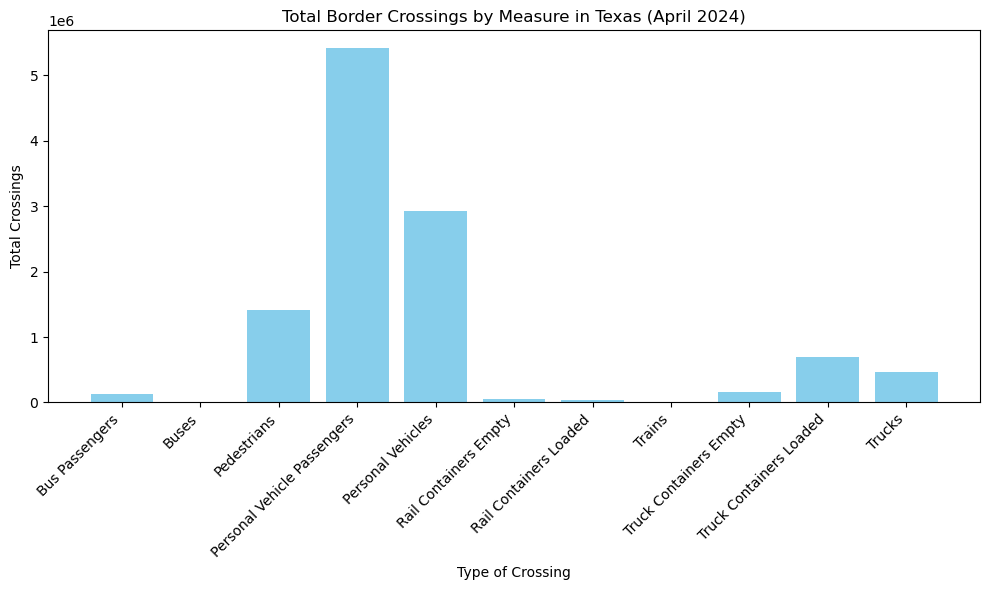

In [39]:
import matplotlib.pyplot as plt

# Filter for Texas crossings in April 2024
tx_apr_2024 = df[(df['State'] == 'Texas') & (df['Date'] == '2024-04-01')]

# Chart 1: Bar chart of total crossings by Measure
bar_data = tx_apr_2024.groupby('Measure')['Value'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(bar_data['Measure'], bar_data['Value'], color='skyblue')
plt.title('Total Border Crossings by Measure in Texas (April 2024)')
plt.xlabel('Type of Crossing')
plt.ylabel('Total Crossings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart in the notebook
plt.show()


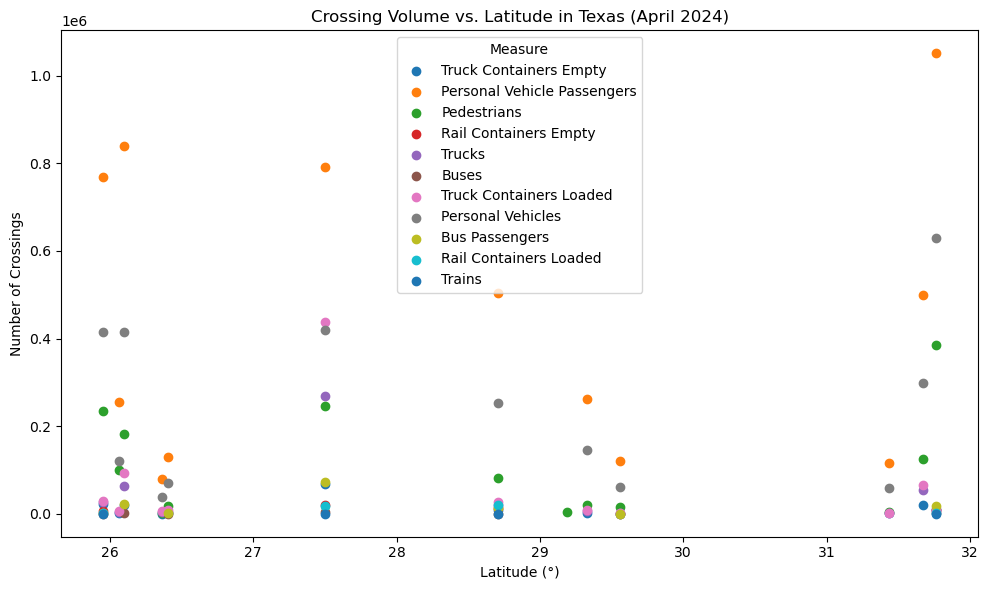

In [40]:
import matplotlib.pyplot as plt

# Chart 2: Scatter plot of Value vs Latitude
plt.figure(figsize=(10, 6))
for measure in tx_apr_2024['Measure'].unique():
    subset = tx_apr_2024[tx_apr_2024['Measure'] == measure]
    plt.scatter(subset['Latitude'], subset['Value'], label=measure)

plt.title('Crossing Volume vs. Latitude in Texas (April 2024)')
plt.xlabel('Latitude (°)')
plt.ylabel('Number of Crossings')
plt.legend(title='Measure')
plt.tight_layout()

# Display the chart inline
plt.show()


## summary

The first visualization, a bar chart, displays the total number of border crossings in Texas for April 2024, broken down by type of crossing (Measure). It highlights which crossing types had the highest volumes, making it easy to compare the relative magnitude of different categories. The second visualization, a scatter plot of crossing volume versus latitude, provides a spatial perspective by showing how the number of crossings varies along the Texas border for each Measure. Together, these visualizations offer complementary insights: the bar chart emphasizes overall totals by category, while the scatter plot reveals geographic patterns, helping to identify areas along the border with higher or lower crossing activity.